In [1]:
from pydub import AudioSegment

sound = AudioSegment.from_wav("C:\\Users\\AleBe\\Documents\\TT\\intento1\\intento\\utils\\audio\\audio\\drums.wav")
sound = sound.set_channels(1)

sound.export("C:\\Users\\AleBe\\Documents\\TT\\intento1\\intento\\utils\\audio\\audio\\drums.wav", format="wav")

C:\Users\AleBe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='C:\\Users\\AleBe\\Documents\\TT\\intento1\\intento\\utils\\audio\\audio\\drums.wav'>

Text(0, 0.5, 'Magnitud')

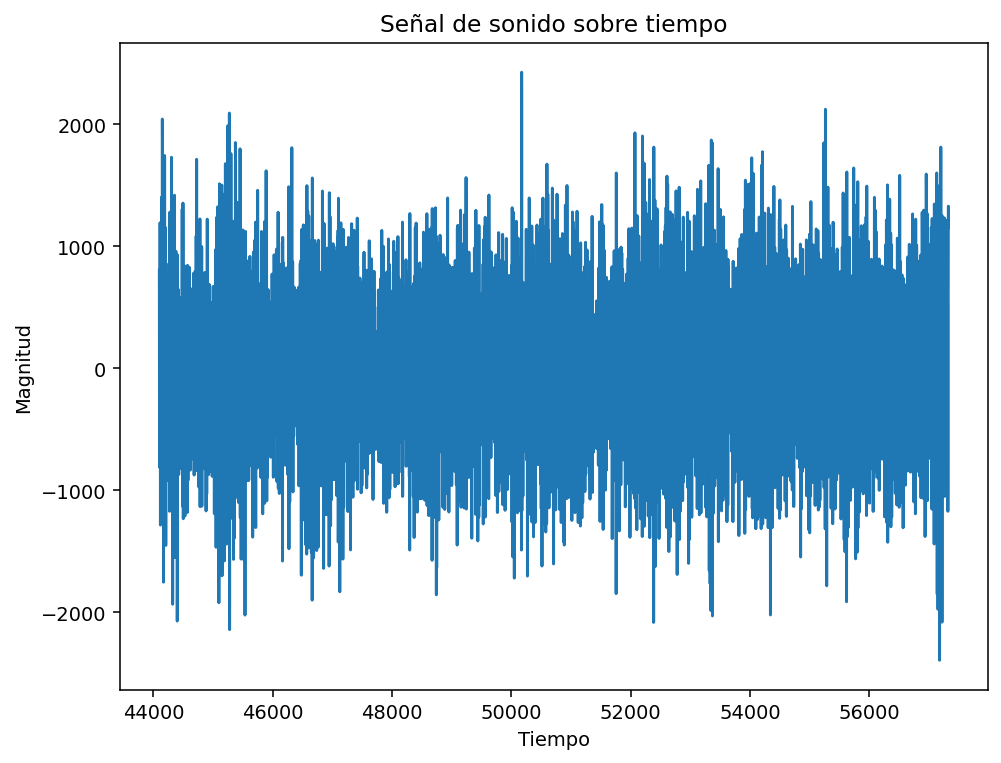

In [2]:
"""Obtener informacion de la pista musical en el tiempo y graficar"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal
import scipy
from scipy.io.wavfile import read

# Configuración de la gráfica
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 140

# Leer archivo en format wav
# Fs = frecuencia de sampling del archivo de audio
Fs, song = read("C:\\Users\\AleBe\\Documents\\TT\\intento1\\intento\\utils\\audio\\audio\\drums.wav")

# Seleccion de puntos de inicio y finalizacion de la grafica
time_to_plot = np.arange(Fs * 1, Fs * 1.3, dtype=int)
plt.plot(time_to_plot, song[time_to_plot])
plt.title("Señal de sonido sobre tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Magnitud")

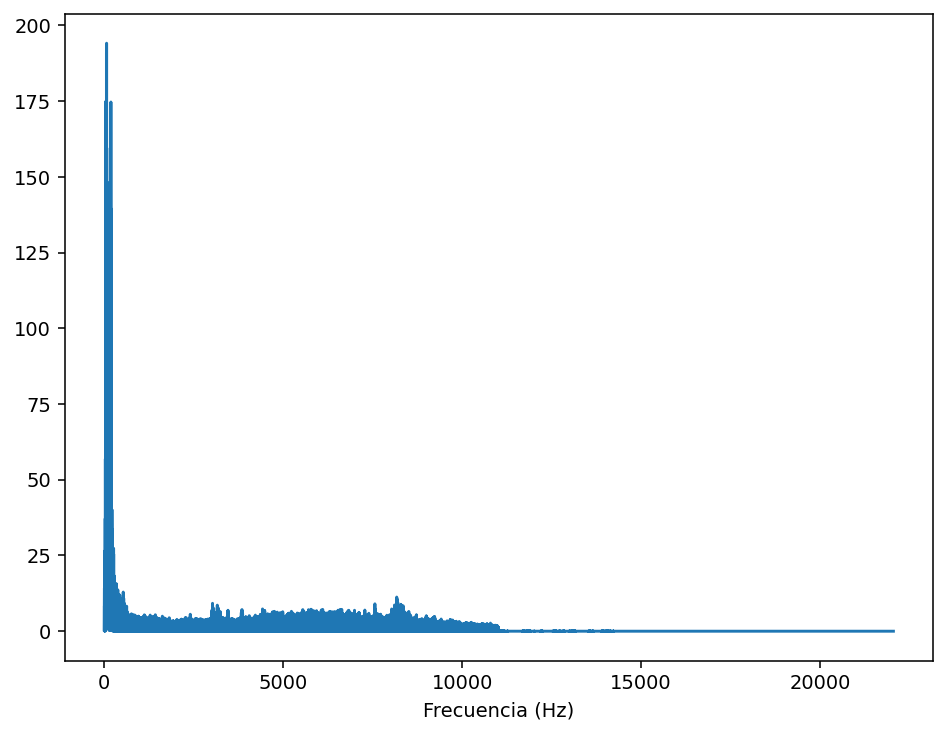

In [3]:
N = len(song)
fft = scipy.fft.fft(song)
transform_y = 2.0 / N * np.abs(fft[0:N//2])
transform_x = scipy.fft.fftfreq(N, 1 / Fs)[:N//2]
plt.plot(transform_x, transform_y)
plt.xlabel("Frecuencia (Hz)");

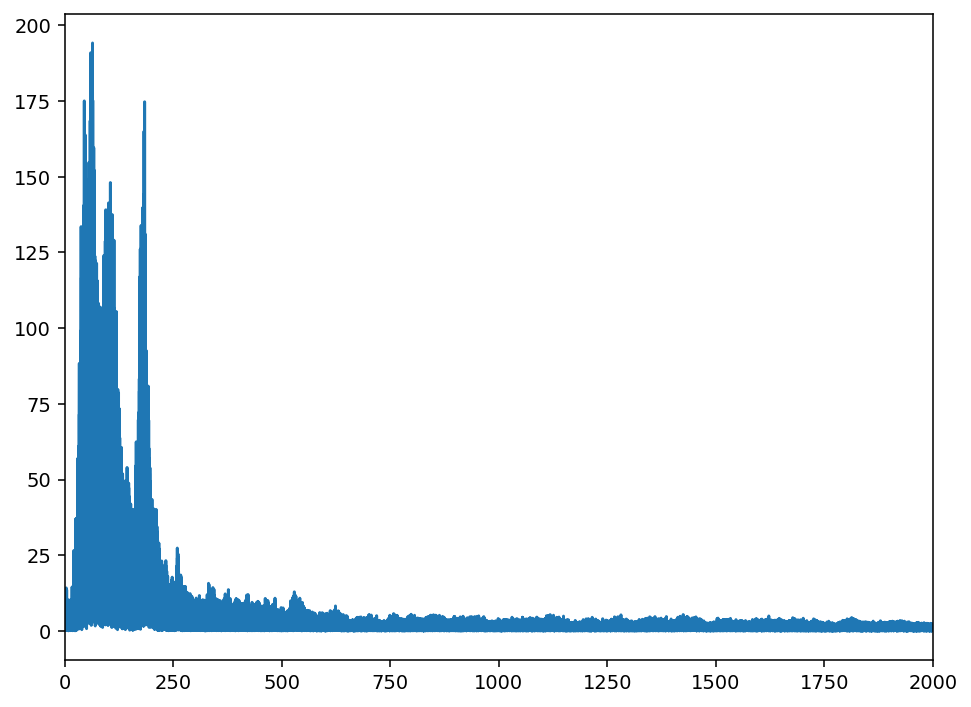

In [4]:
plt.plot(transform_x, transform_y)
plt.xlim(0, 2000);

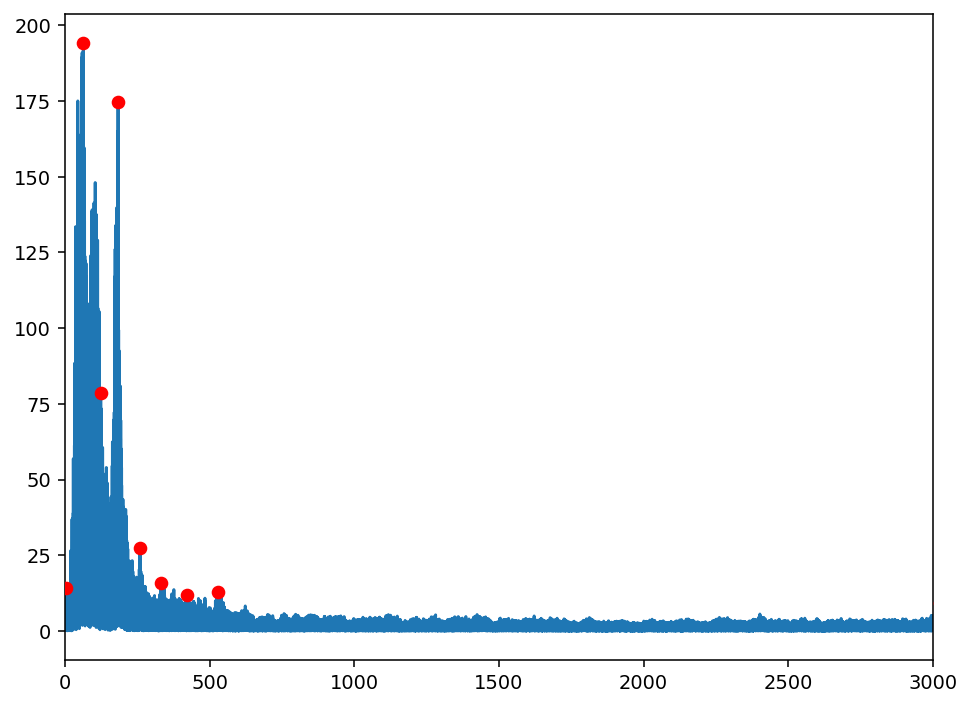

In [5]:
# Usar la función argpartition para encontrar los n-picos más importantes dentro de la señal

todos_los_picos, props = signal.find_peaks(transform_y)

# Encontrar picos con prominencia mínima de 0 y distancia mínima entre picos de 10000
picos, props = signal.find_peaks(transform_y, prominence=0, distance=10000)
n_picos = 15

# Obtener los n_picos picos más grandes a partir de las prominencias
# Explicación útil: https://kanoki.org/2020/01/14/find-k-smallest-and-largest-values-and-its-indices-in-a-numpy-array/
indices_picos_mas_grandes = np.argpartition(props["prominences"], -n_picos)[-n_picos:]
picos_mas_grandes = picos[indices_picos_mas_grandes]

plt.plot(transform_x, transform_y, label="Espectro")
plt.scatter(transform_x[picos_mas_grandes], transform_y[picos_mas_grandes], color="r", zorder=10, label="Picos Restringidos")
plt.xlim(0, 3000)

plt.show()


In [6]:
# Some parameters
window_length_seconds = 3
window_length_samples = int(window_length_seconds * Fs)
window_length_samples += window_length_samples % 2

# Realizar una transformada de Fourier de tiempo corto
# Frecuencias y tiempos son referencias para graficar/analizar más tarde
# La TFTC es una matriz NxM
frequencies, times, stft = signal.stft(
    song, Fs, nperseg=window_length_samples,
    nfft=window_length_samples, return_onesided=True
)

stft.shape

(66151, 114)

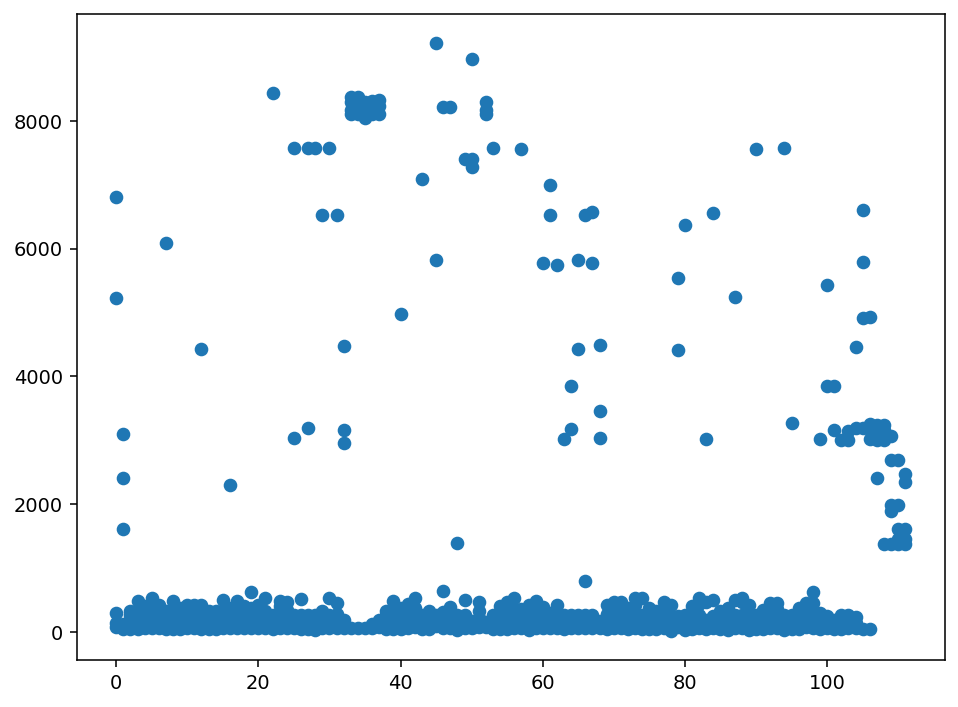

In [7]:
constellation_map = []

for time_idx, window in enumerate(stft.T):
    # Queremos solo valores reales.
    spectrum = abs(window)
    # Los picos corresponden a características interesantes de la señal
    peaks, props = signal.find_peaks(spectrum, prominence=0, distance=200)

    # Con un máximo de 5 por segmento de tiempo
    n_peaks = 5
    # Obtener los n_peaks picos más grandes a partir de las prominencias
    # Explicación útil de argpartition: https://kanoki.org/2020/01/14/find-k-smallest-and-largest-values-and-its-indices-in-a-numpy-array/
    largest_peaks = np.argpartition(props["prominences"], -n_peaks)[-n_peaks:]
    for peak in peaks[largest_peaks]:
        frequency = frequencies[peak]
        constellation_map.append([time_idx, frequency])

# Transformar [(x, y), ...] en ([x1, x2...], [y1, y2...]) para graficar usando zip
plt.scatter(*zip(*constellation_map));
